In [30]:
import tensorflow as tf
from keras.callbacks import TensorBoard
import os
from keras.preprocessing.image import ImageDataGenerator
from keras.optimizers import Adam
from keras.preprocessing.image import load_img
import PIL
from PIL import Image
from keras.applications import Xception

In [31]:
# Membuat class myCallback untuk menghentikan training ketika akurasi sudah mencapai 86% dan val_acc sudah mencapai 86%
class myCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        if logs.get('acc') > 0.86 and logs.get('val_acc') > 0.86:
            print("\nAkurasi telah mencapai >86%!")
            self.model.stop_training = True

In [32]:
TRAINING_DIR = 'dataset/train'
train_datagen = ImageDataGenerator(rescale=1.0/255.0)  # Normalize pixel values between 0 and 1

# Load training data 
# Augmented
train_generator = train_datagen.flow_from_directory(
    TRAINING_DIR,
    target_size=(200, 200),         # Resize images to 128x128
    batch_size=32,                  # 128 images per batch 
    class_mode='categorical',       # binary labels
    seed=32,                        # Optional: Set a random seed for shuffling
    shuffle=True,                   # Shuffle the data during training
    )

        
VALIDATION_DIR = 'dataset/test'
validation_datagen = ImageDataGenerator(rescale=1.0/255.0)  # Normalize pixel values between 0 and 1

# Load validation data
validation_generator = validation_datagen.flow_from_directory(
VALIDATION_DIR,
target_size=(200, 200),  # Resize images to 150x150
batch_size=32,
class_mode='categorical')

Found 557 images belonging to 2 classes.


Found 140 images belonging to 2 classes.


In [33]:
base_model = Xception(weights='imagenet', include_top=False, input_shape=(200, 200, 3))

In [34]:
# Freeze the layers of the base model
for layer in base_model.layers:
    layer.trainable = False

In [35]:
model = tf.keras.models.Sequential([
    base_model,
    
    # # Input Layer
    
    # tf.keras.layers.Conv2D(32, (3, 3), activation = "relu", input_shape = (128, 128, 3)),
    # tf.keras.layers.MaxPooling2D(2, 2),
    
    # #1st Hidden Layer

    # tf.keras.layers.Conv2D(64, (3, 3), activation = "relu"),
    # tf.keras.layers.MaxPooling2D(2, 2),
    
    #  #2nd Hidden Layer
    
    # tf.keras.layers.Conv2D(128, (3, 3), activation = "relu"),
    # tf.keras.layers.MaxPooling2D(2, 2),
    # #3rd Hidden Layer
    
    # tf.keras.layers.Conv2D(256, (3, 3), activation = "relu"),
    # tf.keras.layers.MaxPooling2D(2, 2),
    
    tf.keras.layers.Flatten(),
    
    # Connected Layer
    
    tf.keras.layers.Dense(256, activation = "relu"),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(2, activation = "softmax")
])

In [36]:
# lihat arsitektur model
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 xception (Functional)       (None, 7, 7, 2048)        20861480  
                                                                 
 flatten_1 (Flatten)         (None, 100352)            0         
                                                                 
 dense_2 (Dense)             (None, 256)               25690368  
                                                                 
 dropout_1 (Dropout)         (None, 256)               0         
                                                                 
 dense_3 (Dense)             (None, 2)                 514       
                                                                 
Total params: 46552362 (177.58 MB)
Trainable params: 25690882 (98.00 MB)
Non-trainable params: 20861480 (79.58 MB)
_________________________________________________________________


In [37]:
import datetime
log_dir = "logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = TensorBoard(log_dir=log_dir, histogram_freq=1)

In [38]:
# Compile a Model
from keras.preprocessing.image import load_img

"""
Kasus yang dihadapi disini adalah binary class jadi kita harus menggunakan loss function yang bernama binary crossentropy

"""
model.compile(
    loss='categorical_crossentropy',
    optimizer='Adam',
    metrics=['acc']
   
)

# Train the model
callbacks = myCallback()

history = model.fit(
    train_generator,
    epochs=20,
    verbose=1,
    validation_data=validation_generator,
    callbacks=[tensorboard_callback]
)

Epoch 1/20
18/18 [==============================] - 45s 2s/step - loss: 3.3102 - acc: 0.8743 - val_loss: 0.6332 - val_acc: 0.9429
Epoch 2/20
18/18 [==============================] - 36s 2s/step - loss: 0.4861 - acc: 0.9767 - val_loss: 1.3836 - val_acc: 0.9571
Epoch 3/20
18/18 [==============================] - 36s 2s/step - loss: 0.3312 - acc: 0.9749 - val_loss: 1.1681 - val_acc: 0.9571
Epoch 4/20
18/18 [==============================] - 36s 2s/step - loss: 0.3220 - acc: 0.9838 - val_loss: 0.7471 - val_acc: 0.9643
Epoch 5/20
18/18 [==============================] - 37s 2s/step - loss: 0.2940 - acc: 0.9874 - val_loss: 0.6263 - val_acc: 0.9571
Epoch 6/20
18/18 [==============================] - 37s 2s/step - loss: 0.0705 - acc: 0.9910 - val_loss: 2.8806 - val_acc: 0.9286
Epoch 7/20
18/18 [==============================] - 37s 2s/step - loss: 0.1122 - acc: 0.9928 - val_loss: 0.9903 - val_acc: 0.9500
Epoch 8/20
18/18 [==============================] - 39s 2s/step - loss: 0.0387 - acc: 0.99

In [39]:
# Save the model to a file
model.save('model_catdogs.h5')

c:\Users\arief\miniconda3\envs\tf\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [40]:
# Load the saved model
load_model = tf.keras.models.load_model('model_catdogs.h5')

<Figure size 640x480 with 0 Axes>

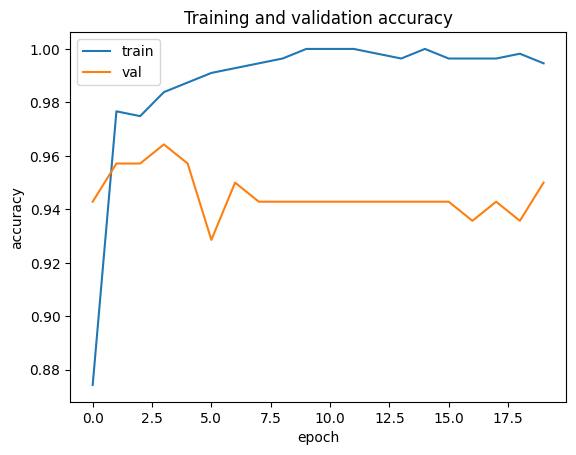

<Figure size 640x480 with 0 Axes>

In [41]:
import matplotlib.pyplot as plt

# Retrieve a list of list results on training and test data sets for each training epoch

acc = history.history['acc']
val_acc = history.history['val_acc']

loss = history.history['loss']
val_loss = history.history['val_loss']


# Plot training and validation accuracy per epoch

plt.plot(acc)
plt.plot(val_acc)
plt.title('Training and validation accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.figure()

In [43]:
# Evaluate on test dataset
score = model.evaluate(validation_generator, verbose=False)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 1.160678744316101
Test accuracy: 0.949999988079071
